## **Predicting Banana Quality using Machine Learning**

#### This notebook will introduce some foundation machine learning and data science concepts by exploring the quality of bananas **classification.** It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

### **What is classification?**

####  Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification.**

### **Steps Machine Learning Modelling Framework**

#### More specifically, we'll look at the following topics.
#### &emsp; • **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
#### &emsp; • **Model training** - create model(s) to learn to predict a target variable based on other variables.
#### &emsp; • **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
#### &emsp; • **Model comparison** - comparing several different models to find the best one.
#### &emsp; • **Model fine-tuning** - once we've found a good model, how can we improve it?
#### &emsp; • **Feature importance** - since we're predicting the quality of the bananas, are there some things which are more important for prediction?
#### &emsp; • **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
#### &emsp; • **Reporting what we've found** - if we had to present our work, what would we show someone?
#### To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks

### **1. About the dataset**

#### The tabular dataset holds numerical attributes describing the quality of bananas, including their size, weight, sweetness (Brix), acidity (pH), softness, harvest time, and ripeness. 

### **2. Dataset Columns**

#### &emsp; **Size** - Size of bananas in cm
#### &emsp; **Weight** - Weight of bananas in gr
#### &emsp; **Sweetness** - Sweetness level in Brix
#### &emsp; **Softness** - Softness of fruit
#### &emsp; **HarvestTime** - Amount of time for harvesting the fruit
#### &emsp; **Ripeness** - Ripeness of fruit
#### &emsp; **Acidity** - Acidity level (pH)
#### &emsp; **Quality** - Quality of fruit

### **3. Evaluation**

#### The evaluation metric is something you might define at the start of a project. 
#### Since machine learning is very experimental, you might say something like, if we can reach **95% accuracy** at predicting whether or not a banana has good quality during the proof of concept, we'll pursue this project.
#### The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.
#### However, due to the nature of experimentation, the evaluation metric may change over time.

### **4. Importing Libraries**

In [72]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import RocCurveDisplay, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### **5. Loading Data**

In [73]:
bananaData = pd.read_csv("Dataset/banana_quality.csv")
print("Dimension of the dataset:", bananaData.shape)

Dimension of the dataset: (8000, 8)


#### The dataset holds 8000 sample distributed in the following features: Size, 		Weight, Sweetness, Softness, Harvest Time, Ripeness, Acidity, and Quality.

### **6. Exploratory data analysis (EDA)**

####  Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.
#### Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.
#### Once of the quickest and easiest ways to check your data is with the head() function. Calling it on any dataframe will print the top 5 rows, tail() calls the bottom 5. You can also pass a number to them like head(10) to show the top 10 rows.

#### **Getting the columns and data types**

In [74]:
bananaData.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [75]:
bananaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


#### **Top and bottom 10 records**

In [76]:
bananaData.head(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
5,-2.807722,1.138136,3.447627,-1.713302,-2.220912,2.079410,2.281203,Good
6,-0.230208,2.783471,1.681184,-0.529779,-1.958468,1.348143,2.181766,Good
7,-1.348515,3.232281,4.011817,-0.890606,-0.031994,2.395917,1.042878,Good
8,-2.012226,1.928034,0.698746,-0.959772,-1.349721,1.311802,1.048762,Good
9,0.053035,1.309993,-0.264139,-2.969297,0.303983,3.889359,1.931332,Good


In [77]:
bananaData.tail(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7990,-1.468650,0.258104,-1.733331,0.939175,0.302571,-1.382287,3.830090,Bad
7991,-4.559045,-0.449785,1.895221,2.126339,-4.577347,2.585295,1.015110,Bad
7992,-3.901210,0.364839,2.004397,1.809546,-1.106952,-1.586317,1.896975,Bad
7993,-0.908573,0.303526,-1.448441,1.275473,0.311950,-1.815395,2.371496,Bad
7994,-1.409043,0.126115,-2.169534,1.711242,0.115379,-1.146596,2.834771,Bad
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


#### **Statistical description**

In [78]:
bananaData.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,8000.0,-0.747802,2.136023,-7.998074,-2.277651,-0.897514,0.654216,7.970800
Weight,8000.0,-0.761019,2.015934,-8.283002,-2.223574,-0.868659,0.775491,5.679692
Sweetness,8000.0,-0.770224,1.948455,-6.434022,-2.107329,-1.020673,0.311048,7.539374
Softness,8000.0,-0.014441,2.065216,-6.959320,-1.590458,0.202644,1.547120,8.241555
HarvestTime,8000.0,-0.751288,1.996661,-7.570008,-2.120659,-0.934192,0.507326,6.293280
Ripeness,8000.0,0.781098,2.114289,-7.423155,-0.574226,0.964952,2.261650,7.249034
Acidity,8000.0,0.008725,2.293467,-8.226977,-1.629450,0.098735,1.682063,7.411633


#### **Observing null and duplicated values**

In [79]:
bananaData.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [80]:
bananaData.duplicated().sum()

0

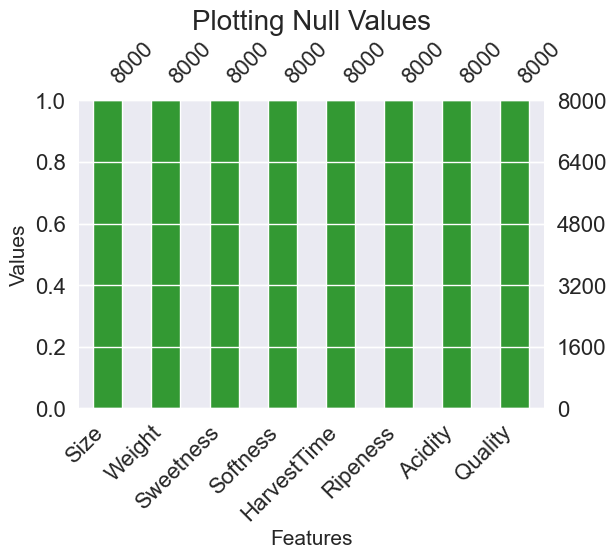

In [81]:
sns.set(style="darkgrid", palette="deep")
plt.title("Plotting Null Values", fontsize=20)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Values", fontsize=15)
msno.bar(bananaData, figsize=(6,4), color=(0.20,0.60,0.20))
plt.show()

##### In our case, there are no missing values and all of our columns are numerical except from quality.

#### **Selecting the features and target**

In [82]:
features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
target = 'Quality'

In [83]:
print("Target Data Distribution")
bananaData[target].value_counts()

Target Data Distribution


Quality
Good    4006
Bad     3994
Name: count, dtype: int64

#### **Target Data Distribution**

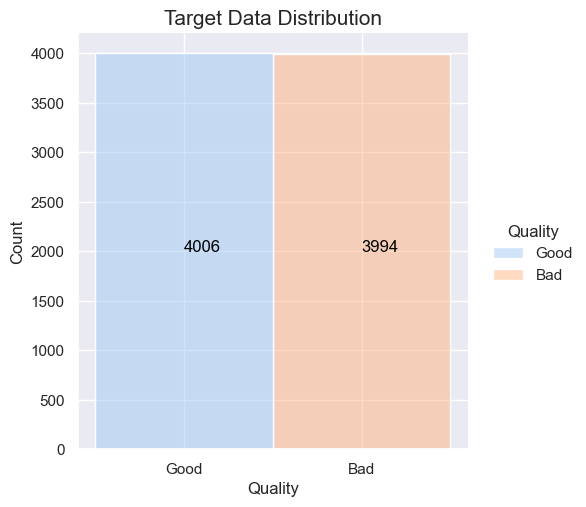

In [84]:
sns.set(style="darkgrid", palette="pastel")
sns.displot(data=bananaData, x="Quality", hue="Quality")

plt.title("Target Data Distribution", fontsize=15)
annot = bananaData[target].value_counts()
for index, value in enumerate(annot):
    plt.text(x=index, y=2000, s=value, color="black")

plt.grid(True)
plt.show()

##### Our target column can be considered **balanced** due to is closed to even.

#### **Analysing the features**

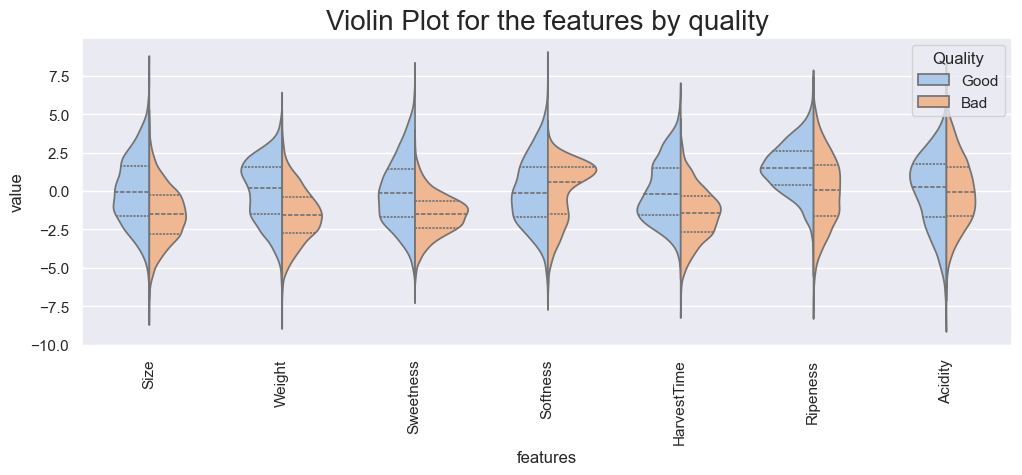

In [85]:
sns.set(style="darkgrid", palette="pastel")
plt.figure(figsize=(12,4))
plt.title("Violin Plot for the features by quality", fontsize=20)
plot_data = pd.melt(bananaData, id_vars="Quality", var_name="features", value_name="value")
sns.violinplot(data=plot_data, x="features", y="value", hue="Quality", split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

##### At first glance, we can observe the banana quality is barely affected by acidity. We can observe that "good" and "bad" quality by acidity is almost balanced which does not represent a variable to determine the quality itself.

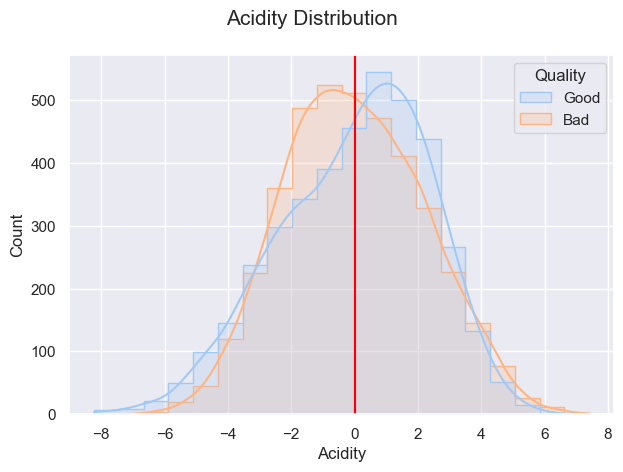

In [86]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Acidity'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Acidity'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Acidity'].mean(), color="red")
plt.suptitle("Acidity Distribution", fontsize=15)
plt.tight_layout()
plt.show()

##### Nevertheless the sweetness and softness can be variables to determine a good or bad quality in the bananas. Let's plot the these variables to get insights and analyse the results.

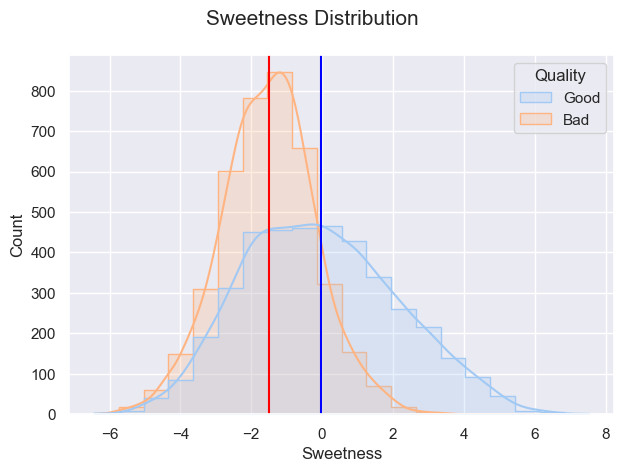

In [87]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Sweetness'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Sweetness'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Sweetness'].mean(), color="red")
plt.suptitle("Sweetness Distribution", fontsize=15)
plt.tight_layout()
plt.show()

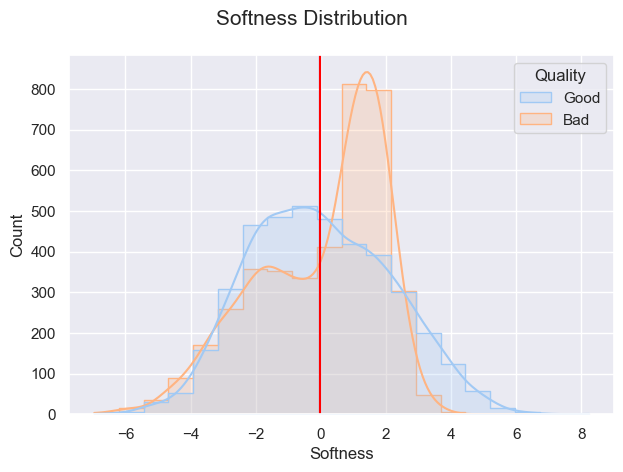

In [88]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Softness'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Softness'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Softness'].mean(), color="red")
plt.suptitle("Softness Distribution", fontsize=15)
plt.tight_layout()
plt.show()

##### Analysing the results we observe that a softer banana tends to get a bad quality on the other hand the sweeter the banana is the better quality it gets.

##### Let's plot the size, weight and ripeness variables to see what we can get.

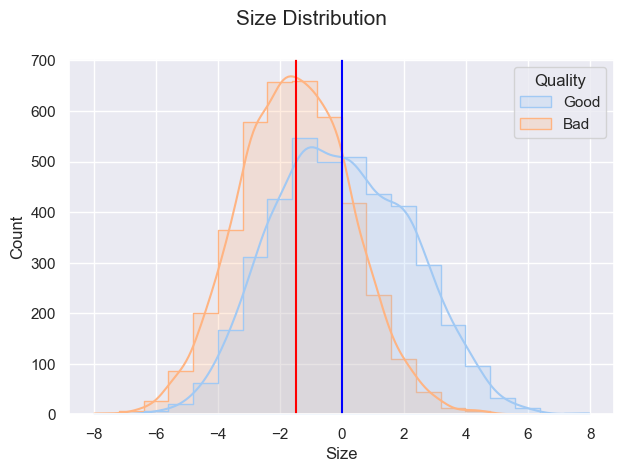

In [89]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Size'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Size'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Size'].mean(), color="red")
plt.suptitle("Size Distribution", fontsize=15)
plt.tight_layout()
plt.show()

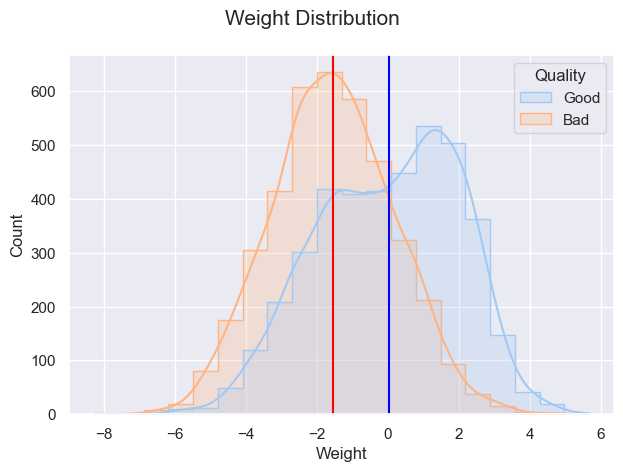

In [90]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Weight'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality == 'Good'")['Weight'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Weight'].mean(), color="red")
plt.suptitle("Weight Distribution", fontsize=15)
plt.tight_layout()
plt.show()

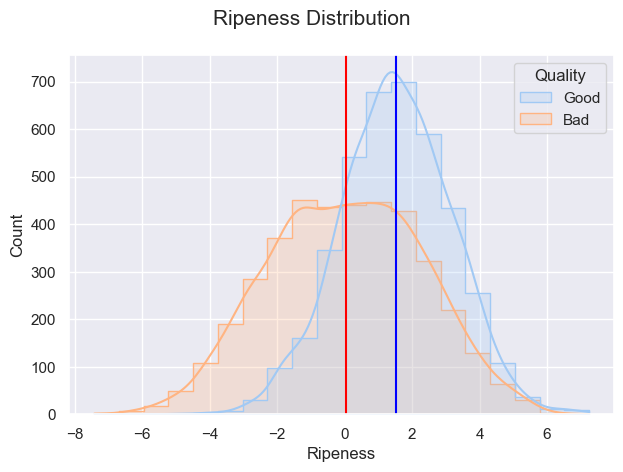

In [91]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Ripeness'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Ripeness'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Ripeness'].mean(), color="red")
plt.suptitle("Ripeness Distribution", fontsize=15)
plt.tight_layout()
plt.show()

##### We observe the size and weight are proportional to determine a good quality in the same way with the ripeness. In summary a banana which is ripe, big and heavy and not too soft we would say that it is a banana with good quality.

#### **Correlation between independent variables**

In [92]:
# Find the correlation between our independent variables
corr_matrix = bananaData[features].corr()
corr_matrix

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000


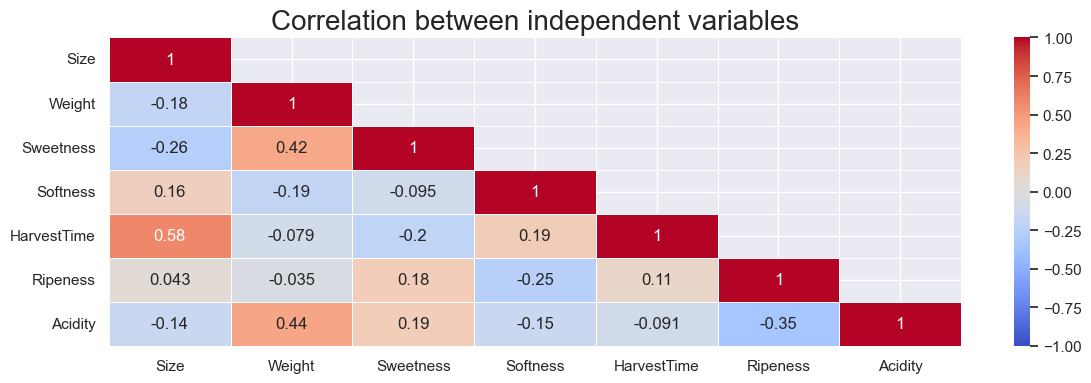

In [157]:
plt.figure(figsize=(12,4))
plt.title("Correlation between independent variables", fontsize=20)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
heatmap = sns.heatmap(corr_matrix, vmax=1, vmin=-1, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.show()

##### A higher positive value means a potential positive correlation (**increase**) and a higher negative value means a potential negative correlation (**decrease**).

### **7. Modelling**

####  We've explored the data, now we'll try to use machine learning to predict our target variable based on the seven independent variables.
####  Keep an eye our target is reaching **95% accuracy** at predicting to conclude we accomplished the project.

In [94]:
# Independent variables (no target column)
X = bananaData[features]
X.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442


In [95]:
# Target variable
y = bananaData[target]
y

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
7995     Bad
7996     Bad
7997     Bad
7998     Bad
7999     Bad
Name: Quality, Length: 8000, dtype: object

In [96]:
y.replace("Good",0,inplace=True)
y.replace("Bad",1,inplace=True)

C:\Users\westm\AppData\Local\Temp\ipykernel_15616\6591187.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace("Bad",1,inplace=True)


#### **Training and test split**

In [97]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### The **test_size** parameter is used to indicate the **train_test_split()** function how much of our data we want in the test set. A rule of thumb is to use 80% of your data to train on and the other 20% to test on.

##### Let's look at our training data.

In [98]:
X_train.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
1467,-1.022637,1.352598,2.166527,-1.593042,-0.374165,1.798778,3.606898
5768,1.506011,-0.716299,-1.649398,3.930426,0.438279,0.953233,-2.082510
5714,2.337325,-2.733094,-1.844521,-0.139976,1.729692,0.459577,-2.012927
1578,-2.040307,1.761035,2.782780,-0.438669,-2.107911,0.886389,1.003219
6958,-2.599652,-1.239019,-1.282005,1.695182,-3.430781,-1.251541,1.678779


In [99]:
y_train, len(y_train)

(1467    0
 5768    0
 5714    0
 1578    0
 6958    1
        ..
 5226    0
 5390    0
 860     0
 7603    0
 7270    1
 Name: Quality, Length: 6400, dtype: int64,
 6400)

##### We can see we're using 6400 samples to train on. Let's look at our test data.

In [100]:
X_test.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
2215,-1.182375,-1.523354,-1.390901,-0.850838,-0.136594,2.331215,-1.828672
2582,-2.190222,-2.809086,-1.394417,2.606318,-0.016427,5.537467,-4.940843
1662,-0.017423,1.187556,4.757299,1.070085,-2.504751,-1.043487,2.541676
3027,-0.266446,-1.913664,-1.837349,-1.088982,-0.487911,3.520379,-1.527580
4343,0.247849,-3.294011,-2.369649,-0.658656,2.591410,0.169002,-2.842879


In [101]:
y_test, len(y_test)

(2215    1
 2582    1
 1662    0
 3027    1
 4343    0
        ..
 1079    0
 7979    1
 1115    0
 6093    1
 6832    1
 Name: Quality, Length: 1600, dtype: int64,
 1600)

##### And we've got 1600 examples we'll test our models on. Let's build some.

#### **Model choices**

##### We'll be using the following and comparing their results.

##### &emsp; 1. Logistic Regression - **LogisticRegression()**
##### &emsp; 2. K-Nearest Neighbors - **KNeighboursClassifier()**
##### &emsp; 3. RandomForest - **RandomForestClassifier()**

In [102]:
# Creating a dictionary models
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

In [103]:
# Random seed for reproducible results
np.random.seed(42)

# Making a list to keep model scores
model_scores = {}

# Looping throught the models
for name, model in models.items():
    
    # Fitting and evaluating the models
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

In [104]:
model_scores

{'KNN': 0.980625, 'Logistic Regression': 0.879375, 'Random Forest': 0.975625}

#### **Model Comparison**

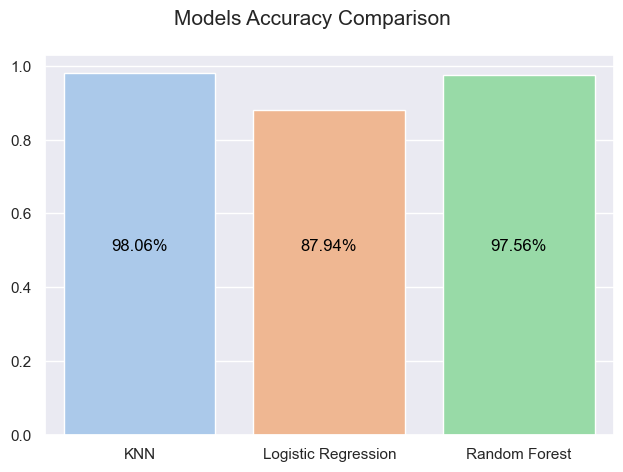

In [156]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
sns.set(style="darkgrid", palette="pastel")
plt.suptitle("Models Accuracy Comparison", fontsize=15)
sns.barplot(data=model_comparison)
for index, value in enumerate(model_scores.values()):
    plt.text(x=index-0.15, y=0.5, s=(str(round(value,4)*100)+"%"), color="black")
plt.tight_layout()
plt.show()

##### We can see it from the graph and at the dictionary, the **KNeighborsClassifier()** and **RandomForestClassifier()** model perform best. As we can see the K-Nearest Neighbors and Random Forest model do not need to be **hyperparameter** due to their great score nevertheless we can work in the Logistic Regresion model in order to know whether it could be better.

#### **Tuning model with RandomizedSearchCV**

##### According to the Scikit-Learn documentation for **Logistic Regression** model, we can tune it using **RandomizedSearchCV**.

##### Let's create a hyperparameter grid (a dictionary of different hyperparameters) for testing it out.

In [106]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 100),
                "solver": ["liblinear"]}

In [107]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid, 
                                cv=10, 
                                n_iter=100, 
                                verbose=True)

In [108]:
# Fitting random hyperparameter search model
rs_log_reg.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [109]:
# Finding the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.298364724028334}

In [110]:
# Evaluating the model
rs_log_reg.score(X_test, y_test)

0.879375

##### We can observe the result was similar to previous that we got. Now we will try tuning it further with **GridSearchCV**

#### **Tuning the model with GridSearchCV**

#####  In short:
##### &emsp; **• RandomizedSearchCV** - tries *n_iter* combinations of hyperparameters and saves the best.
##### &emsp; **• GridSearchCV** - tries *every single* combination of hyperparameters and saves the best.

In [111]:
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid, 
                          cv=10, 
                          verbose=True)

In [112]:
# Fitting random hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [113]:
# Finding the best parameters
gs_log_reg.best_params_

{'C': 0.298364724028334, 'solver': 'liblinear'}

In [114]:
# Evaluating the model
gs_log_reg.score(X_test, y_test)

0.879375

#####  In this case, we got the same results as before since our grid only has a maximum of 100 different hyperparameter combinations.

##### So now let's tune our best models for the study case to see whether can get better result with the hyperparameterisation and decide which model suits best. 

#### **Tuning the K-Nearest Neighbors or KNN model**

In [115]:
train_score = []
test_score = []

# Creating a list of different values for n_neighbors
neighbors = range(1,31)

In [116]:
# Initialising the algorithm
knn = KNeighborsClassifier()

for i in neighbors:
    
    # Set the n_neighbors value
    knn.set_params(n_neighbors = i)
    
    # Fitting the algorithm
    knn.fit(X_train, y_train)

    # Updating the test and train score list
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

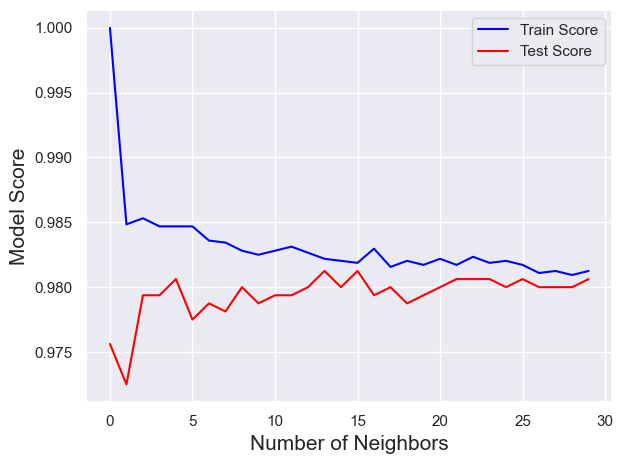

In [155]:
# Plotting the result of Train and Test score
sns.set(style="darkgrid", palette="pastel")
sns.lineplot(train_score, color="blue", label="Train Score")
sns.lineplot(test_score, color="red", label="Test Score")
#plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of Neighbors", fontsize=15)
plt.ylabel("Model Score", fontsize=15)
plt.tight_layout()
plt.show()

In [118]:
#Finding the best score for the KNN
print(f"Maximum KNN Score on the test data is: {max(test_score)*100}%")

Maximum KNN Score on the test data is: 98.125%


##### As we can see the model performed a bit better in comparison with the first time without hyperparameterisation. Let's tune the Random Forest model and see what we get.

#### **Tuning the Random Forest Classifier with RandomizedSearchCV**

In [119]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [120]:
# Setting random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid, 
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [121]:
# Fitting random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [122]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [123]:
# Evaluating the model
rs_rf.score(X_test, y_test)

0.975625

##### The result for Random Forest Classifier model is still the same which got in the firs time so we conclude that the best model to apply in the study case is the **K-Nearest Neighbors** or KNN model.

#### **Evaluating a classification model**

##### So now we will use our model to make predictions on the test set by calling **predict()** on a trained model and passing it the data you would like to predict on.

In [124]:
# Making predictions on test data
y_pred = knn.predict(X_test)

In [125]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

##### Since we have got our prediction values we can find the metrics we want. Let's start with the ROC and AUC.

##### **ROC Curve and AUC Scores**

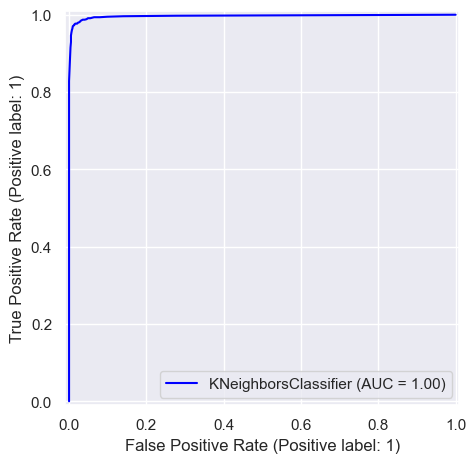

In [153]:
sns.set(style="darkgrid", palette="pastel")
RocCurveDisplay.from_estimator(estimator=knn, X=X_test, y=y_test, color="blue")
plt.tight_layout()
plt.show()

In [127]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

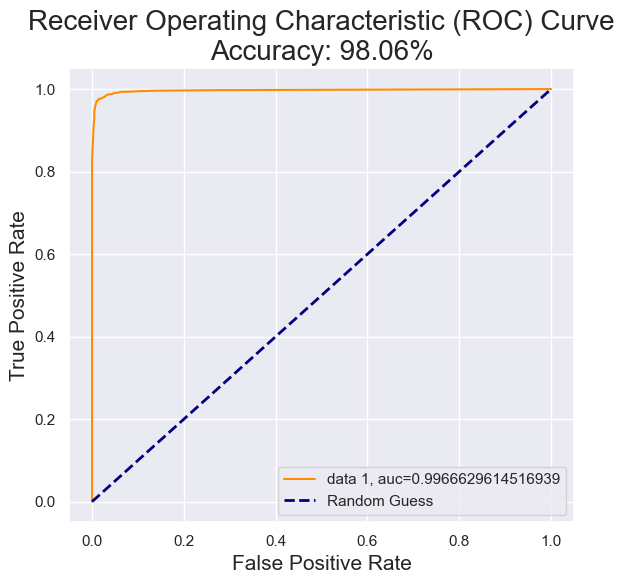

In [152]:
sns.set(style="darkgrid", palette="pastel")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plt.title("Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100), fontsize=20)
plt.plot(fpr,tpr, color="darkorange", label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(loc=4)
plt.tight_layout()
plt.show()

##### This result is great for the study case which means our model is performing very well because we achieved an AUC score of 0.996. Let's continue with another metrics, we will plot the confusion matrix.

##### **Confusion Matrix**

In [139]:
cfn_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
cfn_matrix

,0,1
0,806,13
1,18,763


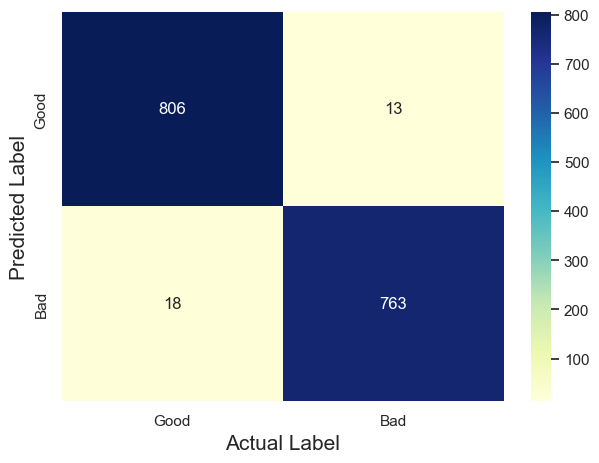

In [151]:
sns.set(style="darkgrid", palette="pastel")
sns.heatmap(cfn_matrix, annot=True, cmap="YlGnBu", fmt="g", xticklabels=["Good", "Bad"], yticklabels=["Good", "Bad"])
plt.xlabel("Actual Label", fontsize=15)
plt.ylabel("Predicted Label", fontsize=15)
plt.tight_layout()
plt.show()

##### We can see the model got confused in small data predicting some false positive.

##### **Classification Report**

In [150]:
print(classification_report(y_test, y_pred, target_names=["Good", "Bad"], zero_division=0))

              precision    recall  f1-score   support

        Good       0.98      0.98      0.98       819
         Bad       0.98      0.98      0.98       781

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



##### We notice our model got **0.98** accuracy in the evaluation which means it suits well, a perfect model get 1.0 nevertheles our study case is in the correct path.
##### Let's get a refresh, the **precision** indicates the proportion of positive identifications, the **recall** indicates the proportion of actual positives which were correctly classified, the **f1-score** is a combination of precision and recall, and the **support** is the number of samples each metric was calculated on.